In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("salida.csv")
prom = {}
for _, row in df.iterrows():
    if not (row["Numero de procesadores"] in prom.keys()):
        prom[row["Numero de procesadores"]] = float(row["Tiempo"])
    else:
        prom[row["Numero de procesadores"]] += float(row["Tiempo"])



In [5]:
prom

{2.0: 9.559958,
 4.0: 11.926534999999998,
 6.0: 15.218827,
 8.0: 13.714449,
 10.0: 16.724229,
 12.0: 15.613510999999997,
 14.0: 16.713822999999998,
 16.0: 17.14575,
 18.0: 17.204856000000003,
 20.0: 17.668103}

In [6]:
dfProm = pd.DataFrame(
{"Numero de procesadores" : prom.keys(),
"Tiempo" : prom.values()
}
)
dfProm["Tiempo"] = dfProm["Tiempo"] / (len(df["Numero de procesadores"]/len(dfProm["Numero de procesadores"])))
dfProm


,Numero de procesadores,Tiempo
0,2.0,0.095600
1,4.0,0.119265
2,6.0,0.152188
3,8.0,0.137144
4,10.0,0.167242
5,12.0,0.156135
6,14.0,0.167138
7,16.0,0.171457
8,18.0,0.172049
9,20.0,0.176681


In [9]:
megabits = 350 * 8
dfProm["Velocidad"] = (megabits*dfProm["Numero de procesadores"]/2) / dfProm["Tiempo"]
dfProm["b"] = dfProm["Velocidad"] * (2/dfProm["Numero de procesadores"])
dfProm

,Numero de procesadores,Tiempo,Velocidad,b
0,2.0,0.095600,29288.831604,29288.831604
1,4.0,0.119265,46954.123725,23477.061862
2,6.0,0.152188,55194.792608,18398.264203
3,8.0,0.137144,81665.694334,20416.423584
4,10.0,0.167242,83710.884370,16742.176874
5,12.0,0.156135,107599.117200,17933.186200
6,14.0,0.167138,117268.203690,16752.600527
7,16.0,0.171457,130644.620387,16330.577548
8,18.0,0.172049,146470.275601,16274.475067
9,20.0,0.176681,158477.681503,15847.768150


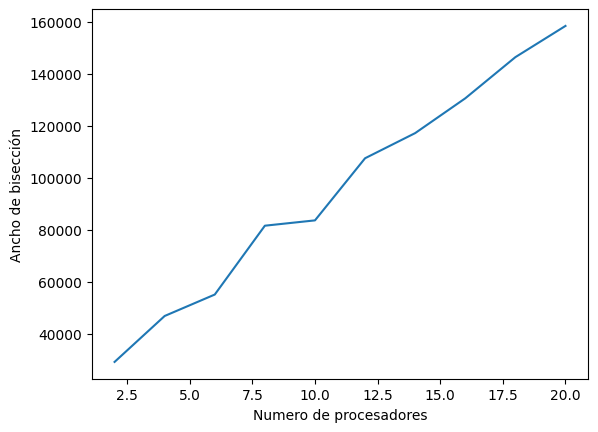

In [10]:
import matplotlib.pyplot as plt

plt.xlabel("Numero de procesadores")
plt.ylabel("Ancho de bisección")
plt.plot(dfProm["Numero de procesadores"], dfProm["Velocidad"])
plt.savefig("salida/fig1ej3.png")
plt.show()